In [1]:
%run "la_00.ipynb"

In [2]:
by_nt_upd['replicates_mean_brightness'] = by_nt_upd['replicates_mean_brightness'].apply(np.log10)
by_nt_upd

,Unnamed: 0,nt_genotype,gene,aa_genotype_pseudo,total_cell_count,n_replicates,replicates_stdev_weighted,replicates_mean_brightness,index_of_dispersion,coefficient_of_variation,ddG_monomer,ddG_monomer_stdev,ddG_dimer,ddG_dimer_stdev,aa_genotype_native
0,0,A100C,amacGFP,E36A,165.00,13.0,1059.270957,3.995216,113.448226,0.107100,NaN,NaN,NaN,NaN,E33A
1,1,A100C:A144T:C172A,amacGFP,E36A:T51S:P60H,30.97,2.0,106.887117,2.388272,46.728167,0.437173,NaN,NaN,NaN,NaN,E33A:T48S:P57H
2,2,A100C:A304C:A436C:T452C:T532C:C566T,amacGFP,E36A:D105A:N149T:L181P,53.61,5.0,289.737621,3.394929,33.812810,0.116701,NaN,NaN,NaN,NaN,E33A:D101A:N145T:L177P
3,3,A100C:A349T,amacGFP,E36A:D120V,39.33,2.0,339.869768,3.977187,12.174127,0.035820,NaN,NaN,NaN,NaN,E33A:D116V
4,4,A100C:A489T:T667C:G681T,amacGFP,E36A:N167Y:F230S:G235W,72.07,6.0,772.824837,3.805555,93.455985,0.120928,NaN,NaN,NaN,NaN,E33A:N163Y:F222S:G227W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126561,125673,T661C:C662G:G663C:C664A:A665T:T666G:G667A:A668T,ppluGFP,F240S:A241H:*246D,112.07,6.0,875.145638,4.405320,30.119034,0.034416,NaN,NaN,NaN,NaN,F220S:A221H:*222D
126562,125679,T666A:G667T:A668G,ppluGFP,*246M,132.15,8.0,1199.467386,4.203663,90.014798,0.075046,NaN,NaN,NaN,NaN,*222M
126563,125682,T666C,ppluGFP,*246R,756.39,31.0,2435.088387,4.250819,332.820445,0.136677,NaN,NaN,NaN,NaN,*222R
126564,125686,T666G,ppluGFP,*246G,491.92,34.0,2395.264114,4.238693,331.141806,0.138249,NaN,NaN,NaN,NaN,*222G


In [3]:
#Take the gene names of the dataset

genes = sorted(set(by_nt_upd.gene))

genes

['amacGFP', 'cgreGFP', 'ppluGFP']

In [4]:
#Calculate the brightness of the wildtype genes

wt_brightness = {}
for gene in genes:
    wt = by_nt_upd[(by_nt_upd['gene']== gene) & (by_nt_upd['nt_genotype']=='wt')]
    wt_brightness[gene] = wt['replicates_mean_brightness'].median()
    
wt_brightness

{'amacGFP': 3.9759417642196695,
 'cgreGFP': 4.494366479589088,
 'ppluGFP': 4.2269429241006415}

In [5]:
#Create a new dataset which will be sorted by gene, amino acid genotype and nucleotide genotype

aa_mut = by_nt_upd.groupby(['gene','aa_genotype_pseudo', 'aa_genotype_native','nt_genotype']).agg({
                         'total_cell_count': np.sum, 'n_replicates': np.sum, 
                         'replicates_mean_brightness': np.median, 
                        'ddG_monomer': np.median, 'ddG_monomer_stdev': np.median,
                        'ddG_dimer': np.median, 'ddG_dimer_stdev': np.median})
aa_mut.reset_index(inplace=True)

aa_mut

,gene,aa_genotype_pseudo,aa_genotype_native,nt_genotype,total_cell_count,n_replicates,replicates_mean_brightness,ddG_monomer,ddG_monomer_stdev,ddG_dimer,ddG_dimer_stdev
0,amacGFP,*246G,*238G,A461C:T714G,53.70,6.0,3.966691,NaN,NaN,NaN,NaN
1,amacGFP,*246G,*238G,A461T:T714G,173.12,12.0,3.989159,NaN,NaN,NaN,NaN
2,amacGFP,*246G,*238G,C131A:T714G,39.57,2.0,3.956547,NaN,NaN,NaN,NaN
3,amacGFP,*246G,*238G,C347A:T714G,64.67,5.0,3.924950,NaN,NaN,NaN,NaN
4,amacGFP,*246G,*238G,C579T:T714G,33.31,4.0,4.059697,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
126561,ppluGFP,wt,wt,T659A,2550.52,100.0,4.229176,NaN,NaN,NaN,NaN
126562,ppluGFP,wt,wt,T659A:C662T,241.75,6.0,4.241842,NaN,NaN,NaN,NaN
126563,ppluGFP,wt,wt,T659C,3953.45,174.0,4.227871,NaN,NaN,NaN,NaN
126564,ppluGFP,wt,wt,T659G,1991.66,49.0,4.225663,NaN,NaN,NaN,NaN


In [6]:
sum_mut = lambda s: (len(s)>0)*(len(s.split(':'))) if s!='wt' else 0
aa_mut['aa_mutnumber'] = aa_mut['aa_genotype_pseudo'].apply(sum_mut)
aa_mut

,gene,aa_genotype_pseudo,aa_genotype_native,nt_genotype,total_cell_count,n_replicates,replicates_mean_brightness,ddG_monomer,ddG_monomer_stdev,ddG_dimer,ddG_dimer_stdev,aa_mutnumber
0,amacGFP,*246G,*238G,A461C:T714G,53.70,6.0,3.966691,NaN,NaN,NaN,NaN,1
1,amacGFP,*246G,*238G,A461T:T714G,173.12,12.0,3.989159,NaN,NaN,NaN,NaN,1
2,amacGFP,*246G,*238G,C131A:T714G,39.57,2.0,3.956547,NaN,NaN,NaN,NaN,1
3,amacGFP,*246G,*238G,C347A:T714G,64.67,5.0,3.924950,NaN,NaN,NaN,NaN,1
4,amacGFP,*246G,*238G,C579T:T714G,33.31,4.0,4.059697,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
126561,ppluGFP,wt,wt,T659A,2550.52,100.0,4.229176,NaN,NaN,NaN,NaN,0
126562,ppluGFP,wt,wt,T659A:C662T,241.75,6.0,4.241842,NaN,NaN,NaN,NaN,0
126563,ppluGFP,wt,wt,T659C,3953.45,174.0,4.227871,NaN,NaN,NaN,NaN,0
126564,ppluGFP,wt,wt,T659G,1991.66,49.0,4.225663,NaN,NaN,NaN,NaN,0


In [7]:
aa_mut =aa_mut[aa_mut['aa_mutnumber'] <= 8]
aa_mut.aa_mutnumber.max()

8

In [8]:
aa_mut_amacGFP = aa_mut[aa_mut.gene=='amacGFP']
aa_mut_amacGFP.reset_index(inplace=True)

aa_mut_amacGFP

,index,gene,aa_genotype_pseudo,aa_genotype_native,nt_genotype,total_cell_count,n_replicates,replicates_mean_brightness,ddG_monomer,ddG_monomer_stdev,ddG_dimer,ddG_dimer_stdev,aa_mutnumber
0,0,amacGFP,*246G,*238G,A461C:T714G,53.70,6.0,3.966691,NaN,NaN,NaN,NaN,1
1,1,amacGFP,*246G,*238G,A461T:T714G,173.12,12.0,3.989159,NaN,NaN,NaN,NaN,1
2,2,amacGFP,*246G,*238G,C131A:T714G,39.57,2.0,3.956547,NaN,NaN,NaN,NaN,1
3,3,amacGFP,*246G,*238G,C347A:T714G,64.67,5.0,3.924950,NaN,NaN,NaN,NaN,1
4,4,amacGFP,*246G,*238G,C579T:T714G,33.31,4.0,4.059697,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45160,45618,amacGFP,wt,wt,T689C,1612.56,112.0,3.973505,NaN,NaN,NaN,NaN,0
45161,45619,amacGFP,wt,wt,T689C:C705T,57.37,7.0,3.981512,NaN,NaN,NaN,NaN,0
45162,45620,amacGFP,wt,wt,T689G,203.89,11.0,4.006488,NaN,NaN,NaN,NaN,0
45163,45621,amacGFP,wt,wt,T689G:C710T,71.84,2.0,4.024163,NaN,NaN,NaN,NaN,0


In [9]:
aa_mut_amacGFP=aa_mut_amacGFP[~aa_mut_amacGFP.aa_genotype_pseudo.str.contains("V14L", na=False)]
aa_mut_amacGFP

,index,gene,aa_genotype_pseudo,aa_genotype_native,nt_genotype,total_cell_count,n_replicates,replicates_mean_brightness,ddG_monomer,ddG_monomer_stdev,ddG_dimer,ddG_dimer_stdev,aa_mutnumber
0,0,amacGFP,*246G,*238G,A461C:T714G,53.70,6.0,3.966691,NaN,NaN,NaN,NaN,1
1,1,amacGFP,*246G,*238G,A461T:T714G,173.12,12.0,3.989159,NaN,NaN,NaN,NaN,1
2,2,amacGFP,*246G,*238G,C131A:T714G,39.57,2.0,3.956547,NaN,NaN,NaN,NaN,1
3,3,amacGFP,*246G,*238G,C347A:T714G,64.67,5.0,3.924950,NaN,NaN,NaN,NaN,1
4,4,amacGFP,*246G,*238G,C579T:T714G,33.31,4.0,4.059697,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45160,45618,amacGFP,wt,wt,T689C,1612.56,112.0,3.973505,NaN,NaN,NaN,NaN,0
45161,45619,amacGFP,wt,wt,T689C:C705T,57.37,7.0,3.981512,NaN,NaN,NaN,NaN,0
45162,45620,amacGFP,wt,wt,T689G,203.89,11.0,4.006488,NaN,NaN,NaN,NaN,0
45163,45621,amacGFP,wt,wt,T689G:C710T,71.84,2.0,4.024163,NaN,NaN,NaN,NaN,0


In [10]:
aa_mut_amacGFP['brightness']=""

aa_mut_amacGFP.loc[aa_mut_amacGFP['replicates_mean_brightness']>=(0.7*3.9759417642196695), 'brightness']='bright'
aa_mut_amacGFP.loc[aa_mut_amacGFP['replicates_mean_brightness']<=(0.7*3.9759417642196695), 'brightness']='dark'
aa_mut_amacGFP


C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Elisenda\Miniconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,index,gene,aa_genotype_pseudo,aa_genotype_native,nt_genotype,total_cell_count,n_replicates,replicates_mean_brightness,ddG_monomer,ddG_monomer_stdev,ddG_dimer,ddG_dimer_stdev,aa_mutnumber,brightness
0,0,amacGFP,*246G,*238G,A461C:T714G,53.70,6.0,3.966691,NaN,NaN,NaN,NaN,1,bright
1,1,amacGFP,*246G,*238G,A461T:T714G,173.12,12.0,3.989159,NaN,NaN,NaN,NaN,1,bright
2,2,amacGFP,*246G,*238G,C131A:T714G,39.57,2.0,3.956547,NaN,NaN,NaN,NaN,1,bright
3,3,amacGFP,*246G,*238G,C347A:T714G,64.67,5.0,3.924950,NaN,NaN,NaN,NaN,1,bright
4,4,amacGFP,*246G,*238G,C579T:T714G,33.31,4.0,4.059697,NaN,NaN,NaN,NaN,1,bright
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45160,45618,amacGFP,wt,wt,T689C,1612.56,112.0,3.973505,NaN,NaN,NaN,NaN,0,bright
45161,45619,amacGFP,wt,wt,T689C:C705T,57.37,7.0,3.981512,NaN,NaN,NaN,NaN,0,bright
45162,45620,amacGFP,wt,wt,T689G,203.89,11.0,4.006488,NaN,NaN,NaN,NaN,0,bright
45163,45621,amacGFP,wt,wt,T689G:C710T,71.84,2.0,4.024163,NaN,NaN,NaN,NaN,0,bright


In [11]:
fraction_amacGFP=pd.crosstab(aa_mut_amacGFP.aa_mutnumber,aa_mut_amacGFP.brightness).replace(0,np.nan).\
     stack().reset_index().rename(columns={0:'time'})
fraction_amacGFP

,aa_mutnumber,brightness,time
0,0,bright,1089.0
1,1,bright,6042.0
2,1,dark,308.0
3,2,bright,9577.0
4,2,dark,1030.0
5,3,bright,5217.0
6,3,dark,1047.0
7,4,bright,2270.0
8,4,dark,738.0
9,5,bright,797.0


In [13]:
fraction_amacGFP['total']=""
fraction_amacGFP['total'][0]=fraction_amacGFP.loc[fraction_amacGFP['aa_mutnumber'] == 0, 'time'].sum()
fraction_amacGFP['total'][1,2]=fraction_amacGFP.loc[fraction_amacGFP['aa_mutnumber'] == 1, 'time'].sum()
fraction_amacGFP['total'][3,4]=fraction_amacGFP.loc[fraction_amacGFP['aa_mutnumber'] == 2, 'time'].sum()
fraction_amacGFP['total'][5,6]=fraction_amacGFP.loc[fraction_amacGFP['aa_mutnumber'] == 3, 'time'].sum()
fraction_amacGFP['total'][7,8]=fraction_amacGFP.loc[fraction_amacGFP['aa_mutnumber'] == 4, 'time'].sum()
fraction_amacGFP['total'][9,10]=fraction_amacGFP.loc[fraction_amacGFP['aa_mutnumber'] == 5, 'time'].sum()
fraction_amacGFP['total'][11,12]=fraction_amacGFP.loc[fraction_amacGFP['aa_mutnumber'] == 6, 'time'].sum()
fraction_amacGFP['total'][13,14]=fraction_amacGFP.loc[fraction_amacGFP['aa_mutnumber'] == 7, 'time'].sum()
fraction_amacGFP['total'][15,16]=fraction_amacGFP.loc[fraction_amacGFP['aa_mutnumber'] == 8, 'time'].sum()

fraction_amacGFP

C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afte

,aa_mutnumber,brightness,time,total
0,0,bright,1089.0,1089
1,1,bright,6042.0,6350
2,1,dark,308.0,6350
3,2,bright,9577.0,10607
4,2,dark,1030.0,10607
5,3,bright,5217.0,6264
6,3,dark,1047.0,6264
7,4,bright,2270.0,3008
8,4,dark,738.0,3008
9,5,bright,797.0,1218


In [14]:
fraction_amacGFP['fraction']=fraction_amacGFP['time']/fraction_amacGFP['total']
fraction_amacGFP

,aa_mutnumber,brightness,time,total,fraction
0,0,bright,1089.0,1089,1
1,1,bright,6042.0,6350,0.951496
2,1,dark,308.0,6350,0.0485039
3,2,bright,9577.0,10607,0.902894
4,2,dark,1030.0,10607,0.0971057
5,3,bright,5217.0,6264,0.832854
6,3,dark,1047.0,6264,0.167146
7,4,bright,2270.0,3008,0.754654
8,4,dark,738.0,3008,0.245346
9,5,bright,797.0,1218,0.654351


In [15]:
fraction_amacGFP=fraction_amacGFP.loc[fraction_amacGFP['brightness'] == 'bright']
fraction_amacGFP

,aa_mutnumber,brightness,time,total,fraction
0,0,bright,1089.0,1089,1
1,1,bright,6042.0,6350,0.951496
3,2,bright,9577.0,10607,0.902894
5,3,bright,5217.0,6264,0.832854
7,4,bright,2270.0,3008,0.754654
9,5,bright,797.0,1218,0.654351
11,6,bright,236.0,480,0.491667
13,7,bright,74.0,175,0.422857
15,8,bright,25.0,96,0.260417


In [16]:
aa_mut_cgreGFP = aa_mut[aa_mut.gene=='cgreGFP']
aa_mut_cgreGFP.reset_index(inplace=True)

aa_mut_cgreGFP

,index,gene,aa_genotype_pseudo,aa_genotype_native,nt_genotype,total_cell_count,n_replicates,replicates_mean_brightness,ddG_monomer,ddG_monomer_stdev,ddG_dimer,ddG_dimer_stdev,aa_mutnumber
0,45623,cgreGFP,*246C,*235C,A707T,87.78,4.0,4.302271,NaN,NaN,NaN,NaN,1
1,45624,cgreGFP,*246G,*235G,T705G,1499.77,22.0,4.466539,NaN,NaN,NaN,NaN,1
2,45625,cgreGFP,A113D,A110D,C331A,274.17,8.0,2.299773,6.7,2.16,5.38,0.94,1
3,45626,cgreGFP,A113D:E229D,A110D:E223D,C331A:G671T,51.53,8.0,2.425549,NaN,NaN,NaN,NaN,2
4,45627,cgreGFP,A113D:E239D,A110D:E231D,C331A:A695T,232.24,4.0,1.976627,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33241,79400,cgreGFP,wt,wt,T95C:G593A,134.83,6.0,4.552573,NaN,NaN,NaN,NaN,0
33242,79401,cgreGFP,wt,wt,T95C:T242C,155.04,4.0,4.491330,NaN,NaN,NaN,NaN,0
33243,79402,cgreGFP,wt,wt,T95C:T242C:A449T,210.31,6.0,4.488483,NaN,NaN,NaN,NaN,0
33244,79403,cgreGFP,wt,wt,T95C:T542C:A608C,205.55,7.0,4.496849,NaN,NaN,NaN,NaN,0


In [17]:
aa_mut_cgreGFP['brightness']=""

aa_mut_cgreGFP.loc[aa_mut_cgreGFP['replicates_mean_brightness']>=(0.7*4.494366479589088), 'brightness']='bright'
aa_mut_cgreGFP.loc[aa_mut_cgreGFP['replicates_mean_brightness']<=(0.7*4.494366479589088), 'brightness']='dark'
aa_mut_cgreGFP

C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Elisenda\Miniconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,index,gene,aa_genotype_pseudo,aa_genotype_native,nt_genotype,total_cell_count,n_replicates,replicates_mean_brightness,ddG_monomer,ddG_monomer_stdev,ddG_dimer,ddG_dimer_stdev,aa_mutnumber,brightness
0,45623,cgreGFP,*246C,*235C,A707T,87.78,4.0,4.302271,NaN,NaN,NaN,NaN,1,bright
1,45624,cgreGFP,*246G,*235G,T705G,1499.77,22.0,4.466539,NaN,NaN,NaN,NaN,1,bright
2,45625,cgreGFP,A113D,A110D,C331A,274.17,8.0,2.299773,6.7,2.16,5.38,0.94,1,dark
3,45626,cgreGFP,A113D:E229D,A110D:E223D,C331A:G671T,51.53,8.0,2.425549,NaN,NaN,NaN,NaN,2,dark
4,45627,cgreGFP,A113D:E239D,A110D:E231D,C331A:A695T,232.24,4.0,1.976627,NaN,NaN,NaN,NaN,2,dark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33241,79400,cgreGFP,wt,wt,T95C:G593A,134.83,6.0,4.552573,NaN,NaN,NaN,NaN,0,bright
33242,79401,cgreGFP,wt,wt,T95C:T242C,155.04,4.0,4.491330,NaN,NaN,NaN,NaN,0,bright
33243,79402,cgreGFP,wt,wt,T95C:T242C:A449T,210.31,6.0,4.488483,NaN,NaN,NaN,NaN,0,bright
33244,79403,cgreGFP,wt,wt,T95C:T542C:A608C,205.55,7.0,4.496849,NaN,NaN,NaN,NaN,0,bright


In [18]:
fraction_cgreGFP=pd.crosstab(aa_mut_cgreGFP.aa_mutnumber,aa_mut_cgreGFP.brightness).replace(0,np.nan).\
     stack().reset_index().rename(columns={0:'time'})
fraction_cgreGFP

,aa_mutnumber,brightness,time
0,0,bright,1588.0
1,1,bright,7415.0
2,1,dark,569.0
3,2,bright,8026.0
4,2,dark,2380.0
5,3,bright,3525.0
6,3,dark,2794.0
7,4,bright,1201.0
8,4,dark,2219.0
9,5,bright,314.0


In [20]:
fraction_cgreGFP['total']=""
fraction_cgreGFP['total'][0]=fraction_cgreGFP.loc[fraction_cgreGFP['aa_mutnumber'] == 0, 'time'].sum()
fraction_cgreGFP['total'][1,2]=fraction_cgreGFP.loc[fraction_cgreGFP['aa_mutnumber'] == 1, 'time'].sum()
fraction_cgreGFP['total'][3,4]=fraction_cgreGFP.loc[fraction_cgreGFP['aa_mutnumber'] == 2, 'time'].sum()
fraction_cgreGFP['total'][5,6]=fraction_cgreGFP.loc[fraction_cgreGFP['aa_mutnumber'] == 3, 'time'].sum()
fraction_cgreGFP['total'][7,8]=fraction_cgreGFP.loc[fraction_cgreGFP['aa_mutnumber'] == 4, 'time'].sum()
fraction_cgreGFP['total'][9,10]=fraction_cgreGFP.loc[fraction_cgreGFP['aa_mutnumber'] == 5, 'time'].sum()
fraction_cgreGFP['total'][11,12]=fraction_cgreGFP.loc[fraction_cgreGFP['aa_mutnumber'] == 6, 'time'].sum()
fraction_cgreGFP['total'][13,14]=fraction_cgreGFP.loc[fraction_cgreGFP['aa_mutnumber'] == 7, 'time'].sum()
fraction_cgreGFP['total'][15,16]=fraction_cgreGFP.loc[fraction_cgreGFP['aa_mutnumber'] == 8, 'time'].sum()

fraction_cgreGFP

C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afte

,aa_mutnumber,brightness,time,total
0,0,bright,1588.0,1588
1,1,bright,7415.0,7984
2,1,dark,569.0,7984
3,2,bright,8026.0,10406
4,2,dark,2380.0,10406
5,3,bright,3525.0,6319
6,3,dark,2794.0,6319
7,4,bright,1201.0,3420
8,4,dark,2219.0,3420
9,5,bright,314.0,1819


In [21]:
fraction_cgreGFP['fraction']=fraction_cgreGFP['time']/fraction_cgreGFP['total']
fraction_cgreGFP

,aa_mutnumber,brightness,time,total,fraction
0,0,bright,1588.0,1588,1
1,1,bright,7415.0,7984,0.928732
2,1,dark,569.0,7984,0.0712675
3,2,bright,8026.0,10406,0.771286
4,2,dark,2380.0,10406,0.228714
5,3,bright,3525.0,6319,0.557841
6,3,dark,2794.0,6319,0.442159
7,4,bright,1201.0,3420,0.35117
8,4,dark,2219.0,3420,0.64883
9,5,bright,314.0,1819,0.172622


In [22]:
fraction_cgreGFP=fraction_cgreGFP.loc[fraction_cgreGFP['brightness'] == 'bright']
fraction_cgreGFP

,aa_mutnumber,brightness,time,total,fraction
0,0,bright,1588.0,1588,1
1,1,bright,7415.0,7984,0.928732
3,2,bright,8026.0,10406,0.771286
5,3,bright,3525.0,6319,0.557841
7,4,bright,1201.0,3420,0.35117
9,5,bright,314.0,1819,0.172622
11,6,bright,100.0,972,0.102881
13,7,bright,36.0,493,0.0730223
15,8,bright,17.0,245,0.0693878


In [23]:
aa_mut_ppluGFP = aa_mut[aa_mut.gene=='ppluGFP']
aa_mut_ppluGFP.reset_index(inplace=True)

aa_mut_ppluGFP

,index,gene,aa_genotype_pseudo,aa_genotype_native,nt_genotype,total_cell_count,n_replicates,replicates_mean_brightness,ddG_monomer,ddG_monomer_stdev,ddG_dimer,ddG_dimer_stdev,aa_mutnumber
0,79405,ppluGFP,*246C,*222C,A668T,80.12,5.0,4.219183,NaN,NaN,NaN,NaN,1
1,79406,ppluGFP,*246C,*222C,C443T:A668T,175.57,8.0,4.221520,NaN,NaN,NaN,NaN,1
2,79407,ppluGFP,*246D,*222D,A665T:T666G:G667A:A668T,248.77,12.0,4.269007,NaN,NaN,NaN,NaN,1
3,79408,ppluGFP,*246G,*222G,A131T:C278T:T666G,46.58,6.0,4.241350,NaN,NaN,NaN,NaN,1
4,79409,ppluGFP,*246G,*222G,C188T:T666G,84.80,4.0,4.247161,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46903,126561,ppluGFP,wt,wt,T659A,2550.52,100.0,4.229176,NaN,NaN,NaN,NaN,0
46904,126562,ppluGFP,wt,wt,T659A:C662T,241.75,6.0,4.241842,NaN,NaN,NaN,NaN,0
46905,126563,ppluGFP,wt,wt,T659C,3953.45,174.0,4.227871,NaN,NaN,NaN,NaN,0
46906,126564,ppluGFP,wt,wt,T659G,1991.66,49.0,4.225663,NaN,NaN,NaN,NaN,0


In [24]:
aa_mut_ppluGFP['brightness']=""

aa_mut_ppluGFP.loc[aa_mut_ppluGFP['replicates_mean_brightness']>=(0.7*4.2269429241006415), 'brightness']='bright'
aa_mut_ppluGFP.loc[aa_mut_ppluGFP['replicates_mean_brightness']<=(0.7*4.2269429241006415), 'brightness']='dark'
aa_mut_ppluGFP

C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Elisenda\Miniconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,index,gene,aa_genotype_pseudo,aa_genotype_native,nt_genotype,total_cell_count,n_replicates,replicates_mean_brightness,ddG_monomer,ddG_monomer_stdev,ddG_dimer,ddG_dimer_stdev,aa_mutnumber,brightness
0,79405,ppluGFP,*246C,*222C,A668T,80.12,5.0,4.219183,NaN,NaN,NaN,NaN,1,bright
1,79406,ppluGFP,*246C,*222C,C443T:A668T,175.57,8.0,4.221520,NaN,NaN,NaN,NaN,1,bright
2,79407,ppluGFP,*246D,*222D,A665T:T666G:G667A:A668T,248.77,12.0,4.269007,NaN,NaN,NaN,NaN,1,bright
3,79408,ppluGFP,*246G,*222G,A131T:C278T:T666G,46.58,6.0,4.241350,NaN,NaN,NaN,NaN,1,bright
4,79409,ppluGFP,*246G,*222G,C188T:T666G,84.80,4.0,4.247161,NaN,NaN,NaN,NaN,1,bright
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46903,126561,ppluGFP,wt,wt,T659A,2550.52,100.0,4.229176,NaN,NaN,NaN,NaN,0,bright
46904,126562,ppluGFP,wt,wt,T659A:C662T,241.75,6.0,4.241842,NaN,NaN,NaN,NaN,0,bright
46905,126563,ppluGFP,wt,wt,T659C,3953.45,174.0,4.227871,NaN,NaN,NaN,NaN,0,bright
46906,126564,ppluGFP,wt,wt,T659G,1991.66,49.0,4.225663,NaN,NaN,NaN,NaN,0,bright


In [25]:
fraction_ppluGFP=pd.crosstab(aa_mut_ppluGFP.aa_mutnumber,aa_mut_ppluGFP.brightness).replace(0,np.nan).\
     stack().reset_index().rename(columns={0:'time'})
fraction_ppluGFP

,aa_mutnumber,brightness,time
0,0,bright,2765.0
1,1,bright,12150.0
2,1,dark,479.0
3,2,bright,15192.0
4,2,dark,1641.0
5,3,bright,7327.0
6,3,dark,1593.0
7,4,bright,2632.0
8,4,dark,1068.0
9,5,bright,833.0


In [26]:
fraction_ppluGFP['total']=""
fraction_ppluGFP['total'][0]=fraction_ppluGFP.loc[fraction_ppluGFP['aa_mutnumber'] == 0, 'time'].sum()
fraction_ppluGFP['total'][1,2]=fraction_ppluGFP.loc[fraction_ppluGFP['aa_mutnumber'] == 1, 'time'].sum()
fraction_ppluGFP['total'][3,4]=fraction_ppluGFP.loc[fraction_ppluGFP['aa_mutnumber'] == 2, 'time'].sum()
fraction_ppluGFP['total'][5,6]=fraction_ppluGFP.loc[fraction_ppluGFP['aa_mutnumber'] == 3, 'time'].sum()
fraction_ppluGFP['total'][7,8]=fraction_ppluGFP.loc[fraction_ppluGFP['aa_mutnumber'] == 4, 'time'].sum()
fraction_ppluGFP['total'][9,10]=fraction_ppluGFP.loc[fraction_ppluGFP['aa_mutnumber'] == 5, 'time'].sum()
fraction_ppluGFP['total'][11,12]=fraction_ppluGFP.loc[fraction_ppluGFP['aa_mutnumber'] == 6, 'time'].sum()
fraction_ppluGFP['total'][13,14]=fraction_ppluGFP.loc[fraction_ppluGFP['aa_mutnumber'] == 7, 'time'].sum()
fraction_ppluGFP['total'][15,16]=fraction_ppluGFP.loc[fraction_ppluGFP['aa_mutnumber'] == 8, 'time'].sum()

fraction_ppluGFP

C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Elisenda\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Elisenda\Miniconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

,aa_mutnumber,brightness,time,total
0,0,bright,2765.0,2765
1,1,bright,12150.0,12629
2,1,dark,479.0,12629
3,2,bright,15192.0,16833
4,2,dark,1641.0,16833
5,3,bright,7327.0,8920
6,3,dark,1593.0,8920
7,4,bright,2632.0,3700
8,4,dark,1068.0,3700
9,5,bright,833.0,1341


In [27]:
fraction_ppluGFP['fraction']=fraction_ppluGFP['time']/fraction_ppluGFP['total']
fraction_ppluGFP

,aa_mutnumber,brightness,time,total,fraction
0,0,bright,2765.0,2765,1
1,1,bright,12150.0,12629,0.962071
2,1,dark,479.0,12629,0.0379286
3,2,bright,15192.0,16833,0.902513
4,2,dark,1641.0,16833,0.0974871
5,3,bright,7327.0,8920,0.821413
6,3,dark,1593.0,8920,0.178587
7,4,bright,2632.0,3700,0.711351
8,4,dark,1068.0,3700,0.288649
9,5,bright,833.0,1341,0.621178


In [28]:
fraction_ppluGFP=fraction_ppluGFP.loc[fraction_ppluGFP['brightness'] == 'bright']
fraction_ppluGFP

,aa_mutnumber,brightness,time,total,fraction
0,0,bright,2765.0,2765,1
1,1,bright,12150.0,12629,0.962071
3,2,bright,15192.0,16833,0.902513
5,3,bright,7327.0,8920,0.821413
7,4,bright,2632.0,3700,0.711351
9,5,bright,833.0,1341,0.621178
11,6,bright,261.0,455,0.573626
13,7,bright,92.0,193,0.476684
15,8,bright,32.0,72,0.444444


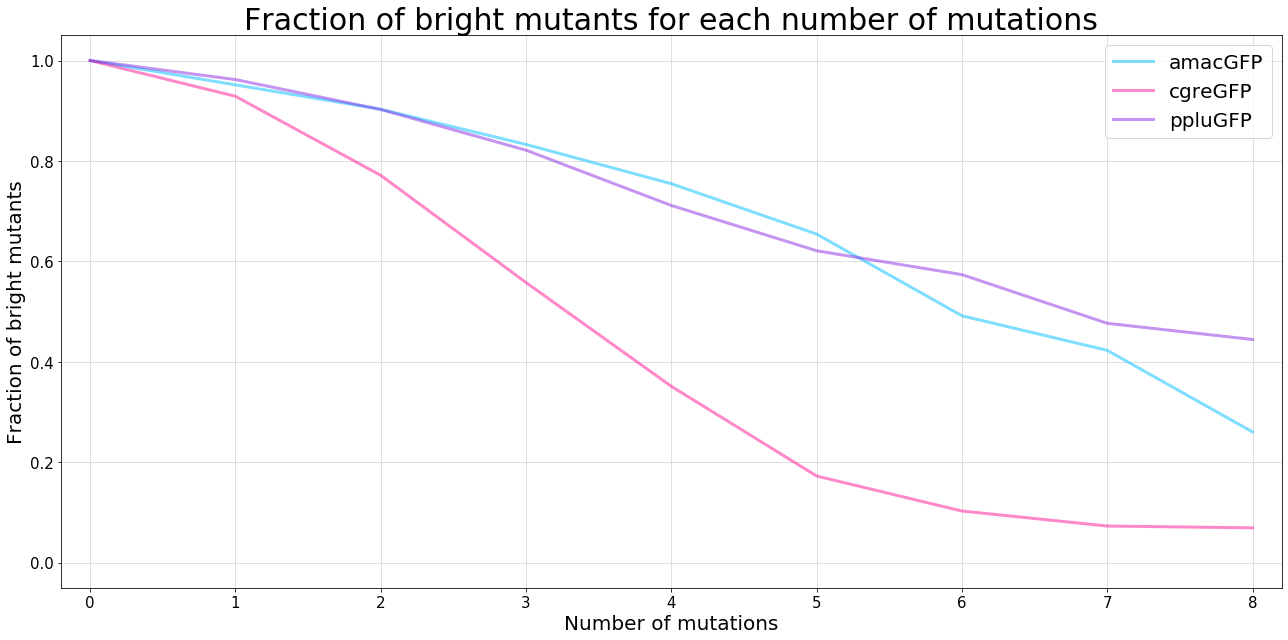

In [30]:
fig, ax = plt.subplots(figsize=(18,9))

ax.plot('aa_mutnumber', 'fraction', data=fraction_amacGFP, c='deepskyblue', linewidth=3, alpha=0.5)
ax.plot('aa_mutnumber', 'fraction', data=fraction_cgreGFP, c='deeppink', linewidth=3, alpha=0.5)
ax.plot('aa_mutnumber', 'fraction', data=fraction_ppluGFP, c='blueviolet', linewidth=3, alpha=0.5)
ax.set_ylabel('Fraction of bright mutants', fontsize=20)
ax.set_xlabel('Number of mutations', fontsize=20)
ax.set_title('Fraction of bright mutants for each number of mutations', fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticks(np.arange(0, 9, step=1));
ax.set_xlim(xmin=-0.2,xmax=8.2)
ax.set_yticks(np.arange(0, 1.2, step=0.2));
ax.set_ylim(ymin=-0.05,ymax=1.05)
ax.grid(alpha=0.5)
plt.legend(["amacGFP", "cgreGFP", "ppluGFP"], fontsize=20)

fig.tight_layout()
plt.savefig('all_mut_num.png', dpi=300)